# Predicting Term Deposit Subscription by a client

## Problem Statement:

The objective of the dataset is to predict whether or not a client will subscribe to the term deposit.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age, job, marital status, and so on.

## Data Definition:

Input variables:

1) age (numeric)

2) job: type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3) marital:    marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) education: (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')

5) default: has credit in default? (categorical: 'no','yes','unknown')

6) housing: has housing loan? (categorical: 'no','yes','unknown')

7) loan: has personal loan? (categorical: 'no','yes','unknown')

8) contact: contact communication type (categorical: 'cellular','telephone')

9) month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10) day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric)

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) euribor3m: euribor 3 month rate - daily indicator (numeric)

20) nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21) y - has the client subscribed a term deposit? (binary: 'yes','no')

## 1. Importing The Libraries

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import matplotlib
import matplotlib.pyplot as plt

# to save graph within the notebook
%matplotlib inline

# import seaborn
import seaborn as sns

# import statsmodel
import statsmodels.api as sm

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to convert the 'exponential' values to float upto 6 decimals
pd.set_option('display.float_format', lambda x: '%.6f' % x)

## 2. Read the Data

In [3]:
# read the data
df_term_deposit = pd.read_csv("bank-additional-full.csv",delimiter=';')

In [4]:
# print the first five rows of the data
df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


## 3. Understanding and Preparing the Data

## 3.1 Data Types and Dimensions

In [5]:
# get the shape
print(df_term_deposit.shape)

(41188, 21)


In [6]:
# check the data types for variables
df_term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
print("Total number of people: {}".format(df_term_deposit.shape[0]))
print("Number of people opted for Term Deposit: {}".format(df_term_deposit[df_term_deposit.y == 'no'].shape[0]))
print("Number of people not opted for Term Deposit: {}".format(df_term_deposit[df_term_deposit.y == 'yes'].shape[0]))

Total number of people: 41188
Number of people opted for Term Deposit: 36548
Number of people not opted for Term Deposit: 4640


### the data is imbalanced

## 3.2 Statistical Summary

In [8]:
# data frame with numerical features
df_term_deposit.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# data frame with categorical features
df_term_deposit.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## 3.3. Label Encoding for Target Variable

### Converting target categorical variable into numeric

In [10]:
# replace 'no' with zero
df_term_deposit['y'] = df_term_deposit['y'].replace('no', 0)
# replace 'yes' with one
df_term_deposit['y'] = df_term_deposit['y'].replace('yes', 1)

df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0


## 3.4. One Hot Encoding for Categorical Variables

In [11]:
# save all categorical columns in list
categorical_columns = [col for col in df_term_deposit.columns.values if df_term_deposit[col].dtype == 'object']

# dataframe with categorical features
data_cat = df_term_deposit[categorical_columns]

# dataframe with numerical features
data_num = df_term_deposit.drop(categorical_columns, axis=1)

In [12]:
# Convert categorical variables into dummy variables.
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [13]:
# merging the two dataframes for further analysis
df_term_deposit = pd.concat([data_num, data_cat_dummies], axis=1)

## 3.5. Missing Data Treatment

In [14]:
# get the count of missing values
missing_values = df_term_deposit.isnull().sum()

# print the count of missing values
print(missing_values)

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

## 3.6 Correlation

In [15]:
# check correlation
data_num = data_num.drop('y', axis=1)
corr = data_num.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


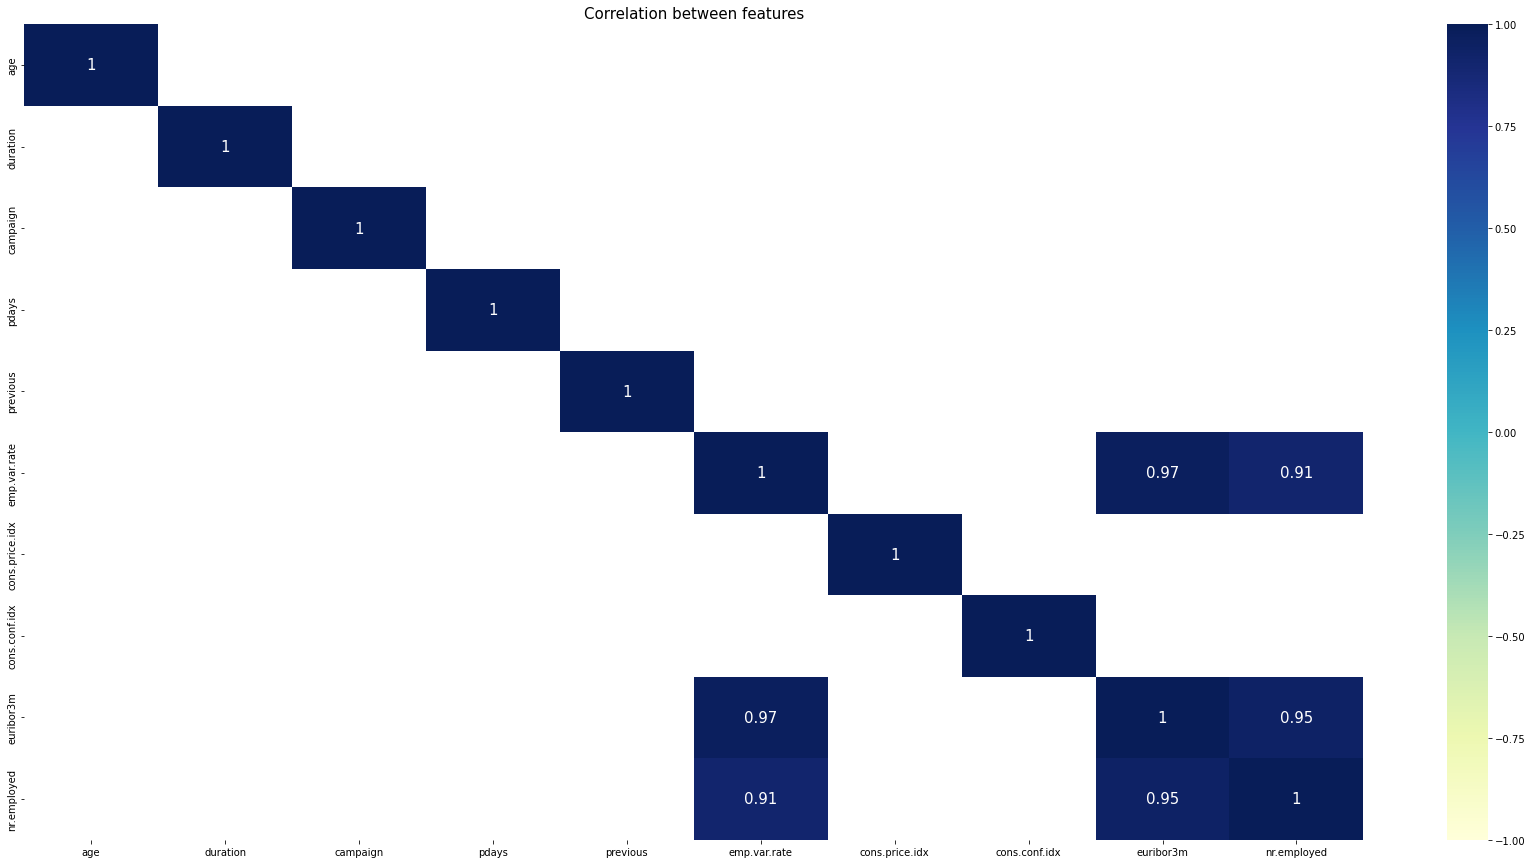

In [16]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

In [17]:
# drop the features
# axis=1: it stands for column
# inplace=True: it perform operations on original data
#df_term_deposit.drop(['euribor3m', 'emp.var.rate', 'nr.employed'], axis=1, inplace=True)

In [18]:
# print the name of columns
df_term_deposit.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

## 4. Support Vector Machine

## 4.1 Support Vector Machine using Linear Kernal

### 1. Split the dataset set

In [19]:
df_term_deposit.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [20]:
# extract the predictor variables
X = df_term_deposit.iloc[:, df_term_deposit.columns != 'y']

# extract the target variable
y = df_term_deposit.iloc[:, df_term_deposit.columns == 'y']

In [21]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (28831, 53)
X_test  (12357, 53)
y_train  (28831, 1)
y_test  (12357, 1)


### 2. Build the model

In [22]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

### 3. Predict the values

In [23]:
# predict the values
y_pred = svclassifier.predict(X_test)

### 4. Compute accuracy measures

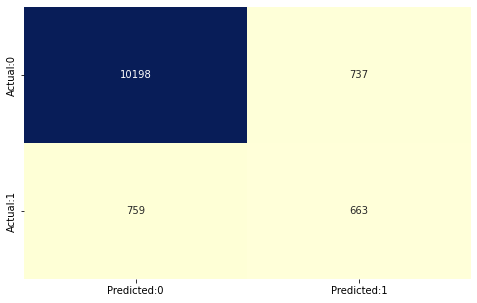

In [24]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [25]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]   

In [26]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10935
           1       0.47      0.47      0.47      1422

    accuracy                           0.88     12357
   macro avg       0.70      0.70      0.70     12357
weighted avg       0.88      0.88      0.88     12357



In [27]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred)

# print kappa
print('kappa value:',kappa)

kappa value: 0.40154874153824094


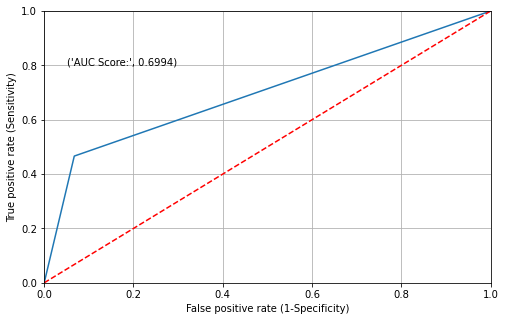

In [28]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

### 5. Tabulate the results

In [29]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
SVM_linear_metrics = pd.Series({'Model': "SVM using linear kernel ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.699423,0.473571,0.466245,0.878935,0.401549,0.469880


## 4.2 Support Vector Machine using Gaussian Kernal

### 1. Build the model

In [30]:
# build the model
svclassifier = SVC(kernel='rbf')

# fit the model
svclassifier.fit(X_train, y_train)

SVC()

### 2. predictions on the test set

In [31]:
# predict the values
y_pred_gaussian  = svclassifier.predict(X_test)

### 3. Compute accuracy measures

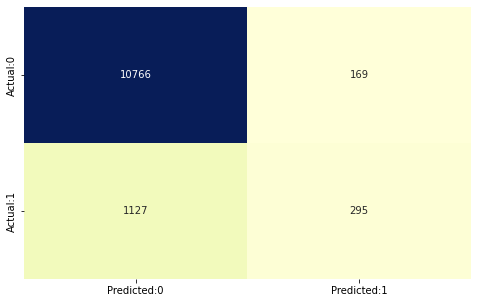

In [32]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_gaussian)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [33]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]  

In [34]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_gaussian)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.31      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [35]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_gaussian)

# print kappa
print('kappa value:',kappa)

kappa value: 0.27158643128078885


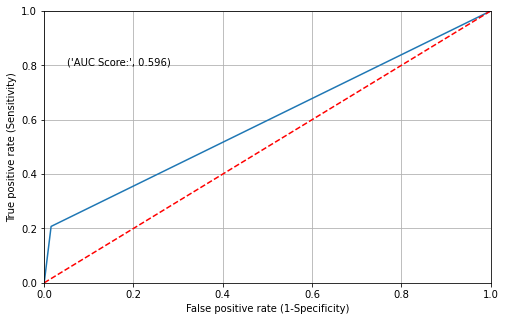

In [36]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gaussian)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_gaussian),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

### 4. Tabulate the results

In [37]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_Gaussian_metrics = pd.Series({'Model': "SVM using gaussian kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gaussian),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gaussian),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gaussian),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gaussian),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_gaussian),
                  'f1-score':metrics.f1_score(y_test, y_pred_gaussian)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_Gaussian_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.699423,0.473571,0.466245,0.878935,0.401549,0.469880
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831


## 4.3 Support Vector Machine using Sigmoid Kernal

### 1. Build the model

In [38]:
# build the model
svclassifier = SVC(kernel = 'sigmoid')

# fit the model
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

### 2. Predict the values for the test set

In [39]:
# predict the values
y_pred_sigmoid  = svclassifier.predict(X_test)

### 3. Compute accuracy measures

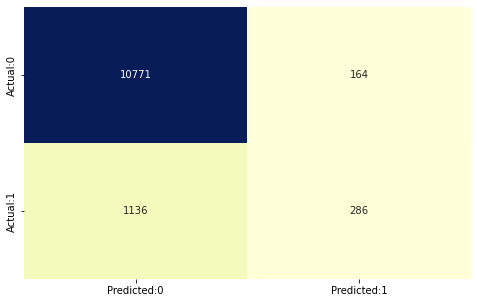

In [40]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_sigmoid)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [41]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]  

In [42]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_sigmoid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10935
           1       0.64      0.20      0.31      1422

    accuracy                           0.89     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.87      0.89      0.87     12357



In [43]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_sigmoid)

# print kappa
print('kappa value:',kappa)

kappa value: 0.26488515915613153


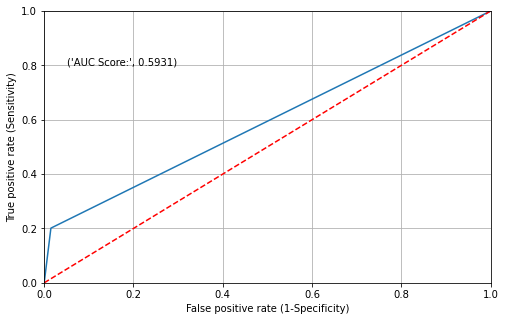

In [44]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sigmoid)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_sigmoid),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

### 5. Tabulate the results

In [45]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_sigmoid_metrics = pd.Series({'Model': "SVM using sigmoid kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_sigmoid),
                 'Precision Score': metrics.precision_score(y_test, y_pred_sigmoid),
                 'Recall Score': metrics.recall_score(y_test, y_pred_sigmoid),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_sigmoid),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_sigmoid),
                  'f1-score':metrics.f1_score(y_test, y_pred_sigmoid)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_sigmoid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.699423,0.473571,0.466245,0.878935,0.401549,0.469880
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556


## 4.4 Support Vector Machine using Polynomial Kernal

### 1. Build the model

In [46]:
# build the model
svclassifier = SVC(kernel='poly')

# fit the model
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

### 2. predictions on the test set

In [47]:
# predict the values
y_pred_Poly  = svclassifier.predict(X_test)

### 3. Compute accuracy measures

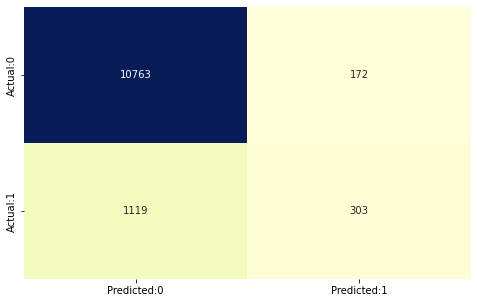

In [48]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [49]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [50]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [51]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly)

# print kappa
print('kappa value:',kappa)

kappa value: 0.2778338883046966


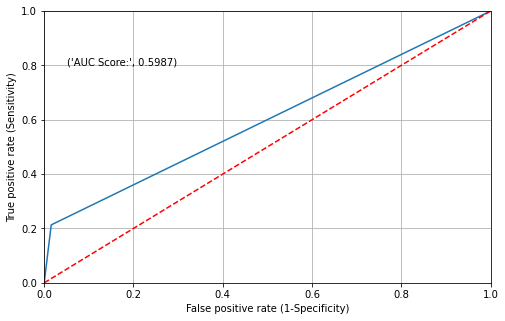

In [52]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

### 4. Tabulate the results

In [53]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_metrics = pd.Series({'Model': "SVM using polynomial kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.699423,0.473571,0.466245,0.878935,0.401549,0.469880
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556
3,SVM using polynomial kernal,0.598675,0.637895,0.213080,0.895525,0.277834,0.319452


## 4.5 Support Vector Machine using Polynomial Kernal with degree of polynomial = 2

### 1. Build the model

In [54]:
# build the model
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')

# fit the model
svclassifier_Poly.fit(X_train, y_train)

SVC(degree=2, gamma='auto', kernel='poly')

### 2. predictions on the test set

In [55]:
# predict the values
y_pred_Poly_d  = svclassifier_Poly.predict(X_test)

### 3. Compute accuracy measures

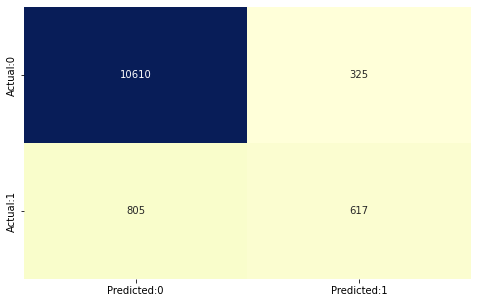

In [56]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly_d)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [57]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [58]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly_d)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.65      0.43      0.52      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [59]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_d)

# print kappa
print('kappa value:',kappa)

kappa value: 0.4737322343204098


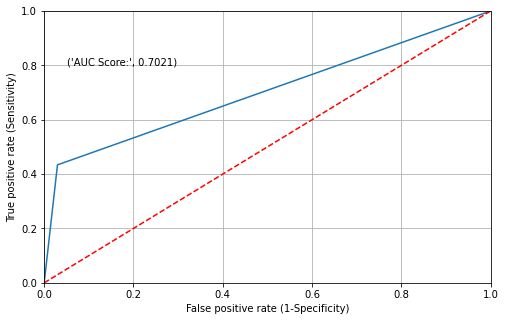

In [60]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_d)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_d),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

### 4. Tabulate the results

In [61]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_d_metrics = pd.Series({'Model': "SVM using polynomial degree 2 kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_d_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.699423,0.473571,0.466245,0.878935,0.401549,0.469880
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556
3,SVM using polynomial kernal,0.598675,0.637895,0.213080,0.895525,0.277834,0.319452
4,SVM using polynomial degree 2 kernal,0.702087,0.654989,0.433896,0.908554,0.473732,0.521997


#### It can be seen from the result tabulation, that accuracy score for the model with polynomial kernel, degree = 2 is better than other models.